In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [46]:
from google.colab import files
fs = files.upload()

Saving Iris.csv to Iris (1).csv


In [49]:
df = pd.read_csv('Iris (1).csv')

In [48]:
df1 = df.copy()

In [ ]:
df1= df1.drop('Id', axis=1)

In [ ]:
df1 = df1.drop('Species',axis =1)

In [ ]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#data cleaning

In [ ]:
df1.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [ ]:
df1.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


In [ ]:
#x and y split

In [ ]:
X = df1.iloc[:, [0,1,2,3]].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [64]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

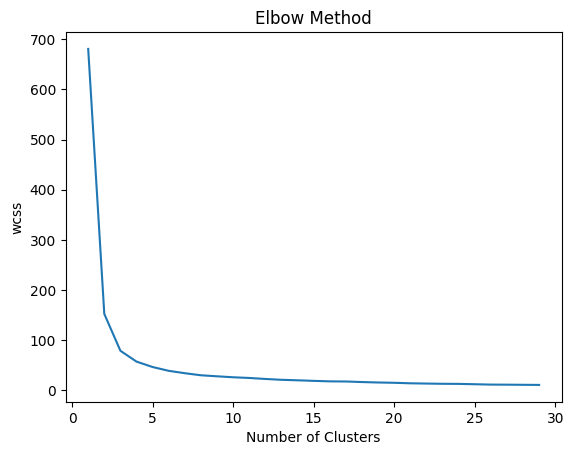

In [65]:
plt.plot(range(1,30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [66]:
from sklearn.cluster import KMeans

In [68]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=500, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

In [69]:
Y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 0, 3, 3, 0, 2, 0, 3, 0,
       3, 3, 3, 4, 3, 3, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0, 4, 4, 3, 0, 0, 0,
       3, 4, 4, 0, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4], dtype=int32)

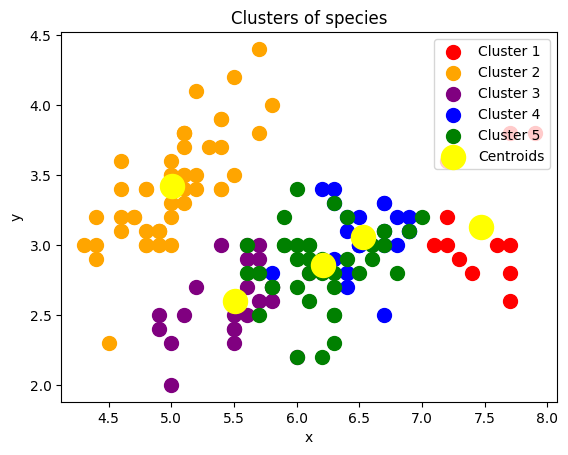

In [70]:
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='orange', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='purple', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='green', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids' )
plt.title('Clusters of species')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [71]:
print (metrics.silhouette_score(X,kmeans.labels_,metric='euclidean'))

0.4885175508886279
